In [3]:
import requests
import os
import inspect


import matplotlib.pyplot as plt
import seaborn as sns

import umap, numpy as np, pandas as pd

from nltk import FreqDist

import pandas as pd

from transformers import AutoModel, AutoTokenizer
from transformers import PreTrainedTokenizer

from sklearn.decomposition import TruncatedSVD
from scipy import sparse
import numpy as np

from collections import Counter
from scipy.sparse import csr_matrix

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

from tensor2tensor.data_generators import text_encoder
import importlib

2025-07-16 21:57:37.423464: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-16 21:57:37.432826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752695857.445374 1607859 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752695857.449077 1607859 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752695857.458612 1607859 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Or for specific warning types:
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [5]:
labyrinthus_df = pd.read_parquet("../data/labyrinthus_df_classified.parquet")
# labyrinthus_df = labyrinthus_df[['author', 'title', 'grela_id', 'sentence_id', 'sentence_text',
#       'context_3sents', 'tokens', 'concordance_tokens', 'classification', 'not_before',
#       'not_after', 'date_random', 'lagt_genre', 'lagt_provenience',
#       'noscemus_genre', 'noscemus_discipline', 'target_token_id',
#       'target_char_start', 'target_char_end']]
labyrinthus_df.sample(5)


,author,title,grela_id,sentence_id,sentence_text,context_3sents,tokens,concordance_tokens,not_before,not_after,date_random,lagt_genre,lagt_provenience,noscemus_genre,noscemus_discipline,target_token_id,target_char_start,target_char_end,classification_single,classification_single_label
474,"Riccioli, Giovanni Battista",Almagestum Novum astronomiam veterem novamque ...,noscemus_699869,noscemus_699869_57086,"Sed minore sumptu, quamuis non minore ingeun u...","Iii. | Sed minore sumptu, quamuis non minore i...","[{'char_end': 3, 'char_start': 0, 'lemma': 'se...","[{'char_end': 17, 'char_start': 11, 'lemma': '...",1651.0,1665.0,1653.0,None,None,Encyclopedic work,Astronomy/Astrology/Cosmography,17103319,82,92,5,scientific_alchemical
286,"Paracelsus, Theophrastus von Hohenheim",None,emlap_100023,emlap_100023_922,"erroneus autem Medicus, minus mirabitur, si in...",Quae candidus Lector aequo animo accipiet sper...,"[{'char_end': 8, 'char_start': 0, 'lemma': 'er...","[{'char_end': 70, 'char_start': 62, 'lemma': '...",1553.0,1553.0,1553.0,None,None,None,None,2563341,109,119,1,metaphorical_general
545,"Galenus,Laguna, Andrés de",Epitome Galeni Pergameni operum in quattuor pa...,noscemus_720096,noscemus_720096_9962,"Ne autem nerui hi, mo media inter huius nerui ...","minor uero, in angustius cumiacentes, quae ob ...","[{'char_end': 2, 'char_start': 0, 'lemma': 'ne...","[{'char_end': 96, 'char_start': 92, 'lemma': '...",1551.0,1551.0,1551.0,None,None,Compendia,Medicine,83793550,150,160,4,medical_anatomical
864,"Linné, Carl von",Amoenitates academicae seu dissertationes vari...,noscemus_913060,noscemus_913060_10662,per uarios enim labyrinthos incedens polline h...,) truncos arborum libro & cortice obductos ad ...,"[{'char_end': 3, 'char_start': 0, 'lemma': 'pe...","[{'char_end': 60, 'char_start': 55, 'lemma': '...",1749.0,1790.0,1761.0,None,None,Dissertation,"Biology, Medicine",141300289,16,27,8,geographical
478,"Riccioli, Giovanni Battista",Almagestum Novum astronomiam veterem novamque ...,noscemus_699869,noscemus_699869_84469,"nunquam uero noctu Meridianum pertransiuit, se...",disparuit: | nunquam uero noctu Meridianum per...,"[{'char_end': 7, 'char_start': 0, 'lemma': 'nu...","[{'char_end': 97, 'char_start': 93, 'lemma': '...",1651.0,1665.0,1653.0,None,None,Encyclopedic work,Astronomy/Astrology/Cosmography,17479037,162,173,5,scientific_alchemical


In [4]:
len(labyrinthus_df)

916

In [5]:
labyrinthus_df["classification_single_label"].value_counts()

classification_single_label
medical_anatomical       194
mythological             183
metaphorical_general     180
geographical             103
philosophical             92
scientific_alchemical     71
poetic                    57
astronomical              18
spiritual_religious       14
historical_political       4
Name: count, dtype: int64

In [6]:
# ===============================================================
# 0. Imports & model
# ===============================================================
import torch, numpy as np, unicodedata
from collections import defaultdict
from transformers import AutoTokenizer, AutoModel

#DEVICE   = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE = "cpu"                     # single line change

In [7]:
MODEL_ID = "xlm-roberta-base"
tokenizer_xlmr = AutoTokenizer.from_pretrained(MODEL_ID)
model_xlmr     = AutoModel.from_pretrained(
                MODEL_ID,
                output_hidden_states=True,
                output_attentions=True
            ).to(DEVICE).eval()

base_path = "/srv/models/latin-bert"

# Initialize the tokenizer with the vocab.txt file and the encoder
vocab_file_path = "/srv/models/latin-bert/vocab.txt" # "/Users/vojtechkase/Projects/latin-bert/models/latin_bert/vocab.txt"  # Update this path
subword_tokenizer_path = "/srv/models/latin-bert/latin.subword.encoder"
# Update this path
encoder = text_encoder.SubwordTextEncoder(subword_tokenizer_path)

spec = importlib.util.spec_from_file_location("latin_tokenizer", os.path.join(base_path, "latin_tokenizer.py"))
latin_tokenizer = importlib.util.module_from_spec(spec)
loader = importlib.util.LazyLoader(spec.loader)
spec.loader.exec_module(latin_tokenizer)

LatinTokenizer = latin_tokenizer.LatinTokenizer

tokenizer_labert = LatinTokenizer(vocab_file_path, encoder)
model_labert = AutoModel.from_pretrained(base_path)

In [8]:
sent = "verum ex libro naturae nos hausimus aliqualem illam conformitatem in facultatibus à seminum & aliarum partium similitudine."
input_ids = tokenizer_labert.encode(sent)
tokens = tokenizer_labert.convert_ids_to_tokens(input_ids)
print(tokens)

input_ids = tokenizer_xlmr.encode(sent)
tokens = tokenizer_xlmr.convert_ids_to_tokens(input_ids)
print(tokens)


['verum_', 'ex_', 'libro_', 'naturae_', 'nos_', 'hausi', 'mus_', 'aliqua', 'lem_', 'illam_', 'conformi', 'tatem_', 'in_', 'facultatibus_', 'à_', 'semi', 'num_', '\\', '32', ';', '&', '\\', '32', ';_', 'aliarum_', 'partium_', 'similit', 'udin', 'e_', '._']
['<s>', '▁ver', 'um', '▁ex', '▁libro', '▁natura', 'e', '▁nos', '▁haus', 'imus', '▁aliqua', 'lem', '▁illam', '▁conformitate', 'm', '▁in', '▁faculta', 'tibus', '▁à', '▁se', 'minum', '▁&', '▁ali', 'arum', '▁parti', 'um', '▁similitud', 'ine', '.', '</s>']


In [76]:
import torch
from collections import defaultdict
import numpy as np
import inspect

# --------------------------------------------------------------
# Helper: Encode with safe truncation and proper device
# --------------------------------------------------------------
def encode_trunc(text: str, tokenizer, device="cpu", max_len=512):
    kwargs = {
        "text": text,
        "return_tensors": "pt",
        "truncation": True,
        "max_length": max_len,
    }
    # Check for optional argument support
    sig = inspect.signature(tokenizer.__call__)
    if "add_special_tokens" in sig.parameters:
        kwargs["add_special_tokens"] = True

    result = tokenizer(**kwargs)
    return result.to(device) if hasattr(result, "to") else result



# --------------------------------------------------------------
# Augmentation with subwords
# --------------------------------------------------------------

def augment_with_subwords(
    tokens: list[dict],
    *,
    tokenizer,
    anchor_use_lemma: bool,
    target_lemma: str
):
    """
    Augments each token with its subword pieces and their positions in the full sentence.

    Parameters:
    -----------
    tokens : list of dict
        Token entries with at least 'lemma' and 'token_text'.
    tokenizer : HuggingFace tokenizer
        A tokenizer with .encode() and .convert_ids_to_tokens().
    anchor_use_lemma : bool
        Whether to use the lemma for the anchor token (instead of surface form).
    target_lemma : str
        The lemma that is considered the anchor.

    Returns:
    --------
    - sent_str: str
        Sentence string reconstructed from tokens.
    - sp_tokens: list of str
        Full sequence of subword tokens, including any special tokens like <s>.
    - aug_tokens: list of dict
        Original tokens augmented with 'sp_first' and 'sp_pieces'.
    """
    target_lemma = target_lemma.lower()
    aug_tokens = []
    words = []
    sp_tokens = []
    sp_pos = 0

    # Decide how the tokenizer encodes special tokens
    prepend = tokenizer.cls_token or "<s>"
    append = tokenizer.sep_token or "</s>"
    if prepend:
        sp_tokens.append(prepend)
        sp_pos += 1

    for t in tokens:
        is_anchor = t["lemma"].lower() == target_lemma
        word = t["lemma"].lower() if is_anchor and anchor_use_lemma else t["token_text"].lower()

        try:
            word_ids = tokenizer(word, add_special_tokens=False)["input_ids"]
        except Exception:
            word_ids = tokenizer.encode(word, add_special_tokens=False)

        subwords = tokenizer.convert_ids_to_tokens(word_ids)

        new_t = dict(t)
        new_t["sp_first"] = sp_pos
        new_t["sp_pieces"] = subwords
        aug_tokens.append(new_t)

        words.append(word)
        sp_tokens.extend(subwords)
        sp_pos += len(subwords)

    if append:
        sp_tokens.append(append)

    sent_str = " ".join(words)
    return sent_str, sp_tokens, aug_tokens


# --------------------------------------------------------------
# Hidden-state embedding from model
# --------------------------------------------------------------
def hidden_anchor_embedding(
    aug_tokens: list[dict],
    sent_str: str,
    *,
    tokenizer,
    model,
    device,
    target_lemma: str,
    layer_idx: int = 8,
    piece_pooling: str = "mean",
):
    target_lemma = target_lemma.lower()
    anchor = next((t for t in aug_tokens if t["lemma"].lower() == target_lemma), None)
    if anchor is None:
        return np.zeros(model.config.hidden_size, dtype=np.float32)

    sp_first = anchor["sp_first"]
    k = len(anchor["sp_pieces"])

    enc = encode_trunc(sent_str, tokenizer=tokenizer, device=device, max_len=tokenizer.model_max_length)
    enc["output_hidden_states"] = True

    if sp_first + k - 1 >= enc["input_ids"].shape[-1]:
        return np.zeros(model.config.hidden_size, dtype=np.float32)

    with torch.no_grad():
        outs = model(**enc)
        hidden = outs.hidden_states[layer_idx].squeeze(0)  # shape [seq_len, dim]

    span = hidden[sp_first: sp_first + k]
    vec = span.sum(dim=0) if piece_pooling == "sum" else span.mean(dim=0)
    return vec.cpu().numpy()


# --------------------------------------------------------------
# Attention-based weighting of lemmas
# --------------------------------------------------------------
import torch

from collections import defaultdict
import torch

def attention_weights_by_lemma(
    aug_tokens: list[dict],
    sent_str: str,
    *,
    tokenizer,
    model,
    device,
    att_layer: int,
    target_lemma: str,
    top_k: int = 3,           # number of top attention heads to keep
    direction: str = "from",  # "from" = target attends to others, "to" = others attend to target
    normalize: bool = True,   # normalize anchor_vec to sum to 1
):
    target_lemma = target_lemma.lower()

    enc = encode_trunc(sent_str, tokenizer=tokenizer, device=device, max_len=tokenizer.model_max_length)
    enc["output_attentions"] = True

    with torch.no_grad():
        outs = model(**enc)
        A_heads = outs.attentions[att_layer][0].cpu()  # shape: [num_heads, L, L]

    anchor = next((t for t in aug_tokens if t["lemma"].lower() == target_lemma), None)
    if anchor is None:
        return {}

    sp_first = anchor["sp_first"]
    k_anchor = len(anchor["sp_pieces"])
    L = A_heads.shape[-1]

    if sp_first + k_anchor - 1 >= L:
        return {}

    # Select attention direction
    if direction == "from":
        per_head_anchor_vecs = A_heads[:, sp_first : sp_first + k_anchor, :].mean(dim=1)  # shape [H, L]
    elif direction == "to":
        per_head_anchor_vecs = A_heads[:, :, sp_first : sp_first + k_anchor].mean(dim=2)  # shape [H, L]
    else:
        raise ValueError("direction must be 'from' or 'to'")

    # Top-k head selection by total attention weight
    head_scores = per_head_anchor_vecs.sum(dim=1)  # [H]
    top_head_ids = torch.topk(head_scores, k=top_k).indices
    anchor_vec = per_head_anchor_vecs[top_head_ids].mean(dim=0)  # [L]

    # Optional normalization
    if normalize and anchor_vec.sum() > 0:
        anchor_vec = anchor_vec / anchor_vec.sum()

    # Lemma-wise aggregation
    lemma_info = defaultdict(lambda: {"weight": 0.0, "pieces": []})
    for t in aug_tokens:
        lemma = t["lemma"].lower()
        if lemma == target_lemma or lemma.strip() == "":
            continue

        start = t["sp_first"]
        end = start + len(t["sp_pieces"])

        if end > anchor_vec.shape[0]:
            continue

        total_w = anchor_vec[start:end].sum().item()
        lemma_info[lemma]["weight"] += total_w

        for j, piece in enumerate(t["sp_pieces"]):
            idx = start + j
            lemma_info[lemma]["pieces"].append({
                "piece": piece,
                "sp_idx": idx,
                "weight": float(anchor_vec[idx]),
            })

    return dict(lemma_info)

In [77]:
row = labyrinthus_df.iloc[3]
tokens = row["tokens"]
print(tokens)
sent_str, sp_tokens, aug_tokens = augment_with_subwords(
    tokens, tokenizer=tokenizer_labert, anchor_use_lemma=True, target_lemma="labyrinthus"
)
vec = hidden_anchor_embedding(aug_tokens, sent_str, tokenizer=tokenizer_labert, model=model_labert, device=DEVICE, target_lemma="labyrinthus")
att_dict = attention_weights_by_lemma(aug_tokens, sent_str, tokenizer=tokenizer_labert, model=model_labert, device=DEVICE, att_layer=7, target_lemma="labyrinthus")

[{'char_end': 4, 'char_start': 0, 'lemma': 'iste', 'pos': 'DET', 'sentence_id': 'cc_10261_892', 'token_id': 230188083, 'token_text': 'Ista'}
 {'char_end': 9, 'char_start': 5, 'lemma': 'sum', 'pos': 'AUX', 'sentence_id': 'cc_10261_892', 'token_id': 230188084, 'token_text': 'fuit'}
 {'char_end': 10, 'char_start': 9, 'lemma': ',', 'pos': 'PUNCT', 'sentence_id': 'cc_10261_892', 'token_id': 230188085, 'token_text': ','}
 {'char_end': 15, 'char_start': 11, 'lemma': 'qui', 'pos': 'PRON', 'sentence_id': 'cc_10261_892', 'token_id': 230188086, 'token_text': 'quae'}
 {'char_end': 19, 'char_start': 16, 'lemma': 'par', 'pos': 'ADJ', 'sentence_id': 'cc_10261_892', 'token_id': 230188087, 'token_text': 'par'}
 {'char_end': 26, 'char_start': 20, 'lemma': 'habeo', 'pos': 'VERB', 'sentence_id': 'cc_10261_892', 'token_id': 230188088, 'token_text': 'habuit'}
 {'char_end': 32, 'char_start': 27, 'lemma': 'rex', 'pos': 'NOUN', 'sentence_id': 'cc_10261_892', 'token_id': 230188089, 'token_text': 'regem'}
 {'cha

In [78]:
att_dict

{'iste': {'weight': 0.009069443680346012,
  'pieces': [{'piece': 'ista_', 'sp_idx': 1, 'weight': 0.009069443680346012}]},
 'sum': {'weight': 0.005491046205861494,
  'pieces': [{'piece': 'fuit_', 'sp_idx': 2, 'weight': 0.0002318080369150266},
   {'piece': 'est_', 'sp_idx': 17, 'weight': 0.00021226877288427204},
   {'piece': 'est_', 'sp_idx': 22, 'weight': 0.0033714966848492622},
   {'piece': 'est_', 'sp_idx': 35, 'weight': 0.001675472711212933}]},
 ',': {'weight': 0.10968669592693914,
  'pieces': [{'piece': ',_', 'sp_idx': 3, 'weight': 0.00013798913278151304},
   {'piece': ',_', 'sp_idx': 11, 'weight': 0.009194368496537209},
   {'piece': ',_', 'sp_idx': 20, 'weight': 0.000798048684373498},
   {'piece': ',_', 'sp_idx': 27, 'weight': 0.09955628961324692}]},
 'qui': {'weight': 0.0002532940998207778,
  'pieces': [{'piece': 'quae_',
    'sp_idx': 4,
    'weight': 0.0002532940998207778}]},
 'par': {'weight': 0.0007301216828636825,
  'pieces': [{'piece': 'par_', 'sp_idx': 5, 'weight': 0.000730

In [44]:
row = labyrinthus_df.iloc[0]
tokens = row["tokens"]
print(tokens)

# Subword augmentation using XLM-R
sent_str, sp_tokens, aug_tokens = augment_with_subwords(
    tokens,
    tokenizer=tokenizer_xlmr,
    anchor_use_lemma=True,
    target_lemma="labyrinthus"
)

# Contextual embedding from XLM-R
vec = hidden_anchor_embedding(
    aug_tokens=aug_tokens,
    sent_str=sent_str,
    tokenizer=tokenizer_xlmr,
    model=model_xlmr,
    device=DEVICE,
    target_lemma="labyrinthus"
)

# Attention weights from XLM-R
att_dict = attention_weights_by_lemma(
    aug_tokens=aug_tokens,
    sent_str=sent_str,
    tokenizer=tokenizer_xlmr,
    model=model_xlmr,
    device=DEVICE,
    att_layer=11,
    target_lemma="labyrinthus")

[{'char_end': 8, 'char_start': 0, 'lemma': 'exploro', 'pos': 'VERB', 'sentence_id': 'cc_10012_2812', 'token_id': 334984550, 'token_text': 'Exploret'}
 {'char_end': 12, 'char_start': 9, 'lemma': 'qui', 'pos': 'PRON', 'sentence_id': 'cc_10012_2812', 'token_id': 334984551, 'token_text': 'qui'}
 {'char_end': 19, 'char_start': 13, 'lemma': 'possum', 'pos': 'VERB', 'sentence_id': 'cc_10012_2812', 'token_id': 334984552, 'token_text': 'potest'}
 {'char_end': 28, 'char_start': 20, 'lemma': 'qualiter', 'pos': 'SCONJ', 'sentence_id': 'cc_10012_2812', 'token_id': 334984553, 'token_text': 'qualiter'}
 {'char_end': 29, 'char_start': 28, 'lemma': ',', 'pos': 'PUNCT', 'sentence_id': 'cc_10012_2812', 'token_id': 334984554, 'token_text': ','}
 {'char_end': 32, 'char_start': 30, 'lemma': 'et', 'pos': 'CCONJ', 'sentence_id': 'cc_10012_2812', 'token_id': 334984555, 'token_text': 'et'}
 {'char_end': 36, 'char_start': 33, 'lemma': 'qui', 'pos': 'PRON', 'sentence_id': 'cc_10012_2812', 'token_id': 334984556, '

In [45]:
att_dict

{'exploro': {'weight': 0.004686874337494373,
  'pieces': [{'piece': '▁explore',
    'sp_idx': 1,
    'weight': 0.0007918261690065265},
   {'piece': 't', 'sp_idx': 2, 'weight': 0.003895048052072525}]},
 'qui': {'weight': 0.012592042796313763,
  'pieces': [{'piece': '▁qui', 'sp_idx': 3, 'weight': 0.003726341761648655},
   {'piece': '▁qua', 'sp_idx': 10, 'weight': 0.008865701034665108}]},
 'possum': {'weight': 0.0017486634897068143,
  'pieces': [{'piece': '▁potest',
    'sp_idx': 4,
    'weight': 0.0017486634897068143}]},
 'qualiter': {'weight': 0.013000113889575005,
  'pieces': [{'piece': '▁quali', 'sp_idx': 5, 'weight': 0.0031700616236776114},
   {'piece': 'ter', 'sp_idx': 6, 'weight': 0.00983005203306675}]},
 ',': {'weight': 0.020362488925457,
  'pieces': [{'piece': '▁', 'sp_idx': 7, 'weight': 0.003955013584345579},
   {'piece': ',', 'sp_idx': 8, 'weight': 0.0024956264533102512},
   {'piece': '▁', 'sp_idx': 18, 'weight': 0.00422362657263875},
   {'piece': ',', 'sp_idx': 19, 'weight': 0

In [14]:
def _xlmr_cols(tokens, tokenizer, target_lemma="labyrinthus", anchor_use_lemma=True):
    """
    Flexible function to generate XLM-R columns for any token input.

    Parameters:
    -----------
    tokens : list[dict]
        Token list (e.g., row["tokens"] or row["concordance_tokens"])
    tokenizer : tokenizer object
        The XLM-R tokenizer
    target_lemma : str
        Target lemma to process
    anchor_use_lemma : bool
        Whether to use lemma form for anchor

    Returns:
    --------
    pd.Series with xlmr_sentence, xlmr_sp_tokens, xlmr_aug_tokens
    """
    sent_str, sp_tokens, aug_tokens = augment_with_subwords(
        tokens,
        tokenizer=tokenizer,
        anchor_use_lemma=anchor_use_lemma,
        target_lemma=target_lemma
    )
    return pd.Series({
        "xlmr_sentence": sent_str,
        "xlmr_sp_tokens": sp_tokens,
        "xlmr_aug_tokens": aug_tokens
    })

def _labert_cols(tokens, tokenizer, target_lemma="labyrinthus", anchor_use_lemma=True):
    """
    Flexible function to generate Latin BERT columns for any token input.

    Parameters:
    -----------
    tokens : list[dict]
        Token list (e.g., row["tokens"] or row["concordance_tokens"])
    tokenizer : tokenizer object
        The Latin BERT tokenizer
    target_lemma : str
        Target lemma to process
    anchor_use_lemma : bool
        Whether to use lemma form for anchor

    Returns:
    --------
    pd.Series with labert_sentence, labert_sp_tokens, labert_aug_tokens
    """
    sent_str, sp_tokens, aug_tokens = augment_with_subwords(
        tokens,
        tokenizer=tokenizer,
        anchor_use_lemma=anchor_use_lemma,
        target_lemma=target_lemma
    )
    return pd.Series({
        "labert_sentence": sent_str,
        "labert_sp_tokens": sp_tokens,
        "labert_aug_tokens": aug_tokens
    })

# Generate columns for regular tokens
labyrinthus_df[["xlmr_sentence", "xlmr_sp_tokens", "xlmr_aug_tokens"]] = (
    labyrinthus_df["tokens"].apply(
        lambda tokens: _xlmr_cols(tokens, tokenizer_xlmr)
    )
)

# Generate columns for concordance tokens
labyrinthus_df[["xlmr_conc_text", "xlmr_conc_sp_tokens", "xlmr_conc_aug_tokens"]] = (
    labyrinthus_df["concordance_tokens"].apply(
        lambda tokens: _xlmr_cols(tokens, tokenizer_xlmr)
    )
)


# For regular tokens
labyrinthus_df[["labert_sentence", "labert_sp_tokens", "labert_aug_tokens"]] = (
    labyrinthus_df["tokens"].apply(
        lambda tokens: _labert_cols(tokens, tokenizer_labert)
    )
)

# For concordance tokens
labyrinthus_df[["labert_conc_text", "labert_conc_sp_tokens", "labert_conc_aug_tokens"]] = (
    labyrinthus_df["concordance_tokens"].apply(
        lambda tokens: _labert_cols(tokens, tokenizer_labert)
    )
)

In [15]:
labyrinthus_df.iloc[0]["labert_conc_aug_tokens"]

[{'char_end': 303,
  'char_start': 299,
  'lemma': 'bonum',
  'pos': 'ADJ',
  'sentence_id': 'cc_10012_2811',
  'token_id': 334984548,
  'token_text': 'bona',
  'sp_first': 1,
  'sp_pieces': ['bona_']},
 {'char_end': 304,
  'char_start': 303,
  'lemma': '.',
  'pos': 'PUNCT',
  'sentence_id': 'cc_10012_2811',
  'token_id': 334984549,
  'token_text': '.',
  'sp_first': 2,
  'sp_pieces': ['._']},
 {'char_end': 8,
  'char_start': 0,
  'lemma': 'exploro',
  'pos': 'VERB',
  'sentence_id': 'cc_10012_2812',
  'token_id': 334984550,
  'token_text': 'Exploret',
  'sp_first': 3,
  'sp_pieces': ['expl', 'oret', '_']},
 {'char_end': 12,
  'char_start': 9,
  'lemma': 'qui',
  'pos': 'PRON',
  'sentence_id': 'cc_10012_2812',
  'token_id': 334984551,
  'token_text': 'qui',
  'sp_first': 6,
  'sp_pieces': ['qui_']},
 {'char_end': 19,
  'char_start': 13,
  'lemma': 'possum',
  'pos': 'VERB',
  'sentence_id': 'cc_10012_2812',
  'token_id': 334984552,
  'token_text': 'potest',
  'sp_first': 7,
  'sp_pie

In [79]:
def _layer_feats(row, layer, tokenizer, model, device=DEVICE, token_type="regular", target_lemma="labyrinthus", model_tag=""):
    """
    Extract layer features (embedding + attention) for given token type and model.

    Parameters:
    -----------
    row : pd.Series
        Row of a DataFrame containing token data.
    layer : int
        Index of the layer to extract from.
    tokenizer : HuggingFace or custom tokenizer object.
    model : HuggingFace model (with output_hidden_states=True, output_attentions=True).
    device : torch.device
        Device to use (CPU/GPU).
    token_type : str
        Either "regular" or "concordance".
    target_lemma : str
        Lemma used for anchor token.
    model_tag : str
        Identifier used in the column name (e.g., "xlmr", "labert").

    Returns:
    --------
    pd.Series with embedding and attention data for the specified layer.
    """
    if token_type == "regular":
        aug_tokens_col = f"{model_tag}_aug_tokens"
        sent_str_col   = f"{model_tag}_sentence"
        embed_col = f"embed_l{layer}_{model_tag}"
        att_col   = f"att_l{layer}_{model_tag}"
    elif token_type == "concordance":
        aug_tokens_col = f"{model_tag}_conc_aug_tokens"
        sent_str_col   = f"{model_tag}_conc_text"
        embed_col = f"embed_conc_l{layer}_{model_tag}"
        att_col   = f"att_conc_l{layer}_{model_tag}"
    else:
        raise ValueError("token_type must be 'regular' or 'concordance'")

    emb = hidden_anchor_embedding(
        aug_tokens    = row[aug_tokens_col],
        sent_str      = row[sent_str_col],
        tokenizer     = tokenizer,
        model         = model,
        device        = device,
        target_lemma  = target_lemma,
        layer_idx     = layer,
        piece_pooling = "mean",
    )
    att = attention_weights_by_lemma(
        aug_tokens   = row[aug_tokens_col],
        sent_str     = row[sent_str_col],
        tokenizer    = tokenizer,
        model        = model,
        device       = device,
        target_lemma = target_lemma,
        att_layer    = layer,
    )
    return pd.Series({embed_col: emb, att_col: att})


for L in range(7, 12):
    # Regular
    labyrinthus_df[[f"embed_l{L}_labert", f"att_l{L}_labert"]] = (
        labyrinthus_df.apply(lambda row: _layer_feats(
            row, layer=L, tokenizer=tokenizer_labert, model=model_labert, token_type="regular", model_tag="labert"
        ), axis=1)
    )
    # Concordance
    labyrinthus_df[[f"embed_conc_l{L}_labert", f"att_conc_l{L}_labert"]] = (
        labyrinthus_df.apply(lambda row: _layer_feats(
            row, layer=L, tokenizer=tokenizer_labert, model=model_labert, token_type="concordance", model_tag="labert"
        ), axis=1)
    )

for L in range(7, 12):
    # Regular
    labyrinthus_df[[f"embed_l{L}_xlmr", f"att_l{L}_xlmr"]] = (
        labyrinthus_df.apply(lambda row: _layer_feats(
            row, layer=L, tokenizer=tokenizer_xlmr, model=model_xlmr, token_type="regular", model_tag="xlmr"
        ), axis=1)
    )
    # Concordance
    labyrinthus_df[[f"embed_conc_l{L}_xlmr", f"att_conc_l{L}_xlmr"]] = (
        labyrinthus_df.apply(lambda row: _layer_feats(
            row, layer=L, tokenizer=tokenizer_xlmr, model=model_xlmr, token_type="concordance", model_tag="xlmr"
        ), axis=1)
    )


In [80]:
labyrinthus_df.columns

Index(['author', 'title', 'grela_id', 'sentence_id', 'sentence_text',
       'context_3sents', 'tokens', 'concordance_tokens', 'not_before',
       'not_after',
       ...
       'att_l9_labert_svd400_embed', 'att_l10_labert_svd400_embed',
       'att_l11_labert_svd400_embed', 'att_conc_l7_labert_svd400_embed',
       'att_conc_l8_labert_svd400_embed', 'att_conc_l9_labert_svd400_embed',
       'att_conc_l10_labert_svd400_embed', 'att_conc_l11_labert_svd400_embed',
       'svd400', 'svd400_conc'],
      dtype='object', length=114)

## Build term-doc co-occurrence matrix

In [81]:
labyrinthus_df.head(5)

,author,title,grela_id,sentence_id,sentence_text,context_3sents,tokens,concordance_tokens,not_before,not_after,...,att_l9_labert_svd400_embed,att_l10_labert_svd400_embed,att_l11_labert_svd400_embed,att_conc_l7_labert_svd400_embed,att_conc_l8_labert_svd400_embed,att_conc_l9_labert_svd400_embed,att_conc_l10_labert_svd400_embed,att_conc_l11_labert_svd400_embed,svd400,svd400_conc
0,Humbertus Silvae Candidae1010-1061,Adversus Simoniacos,cc_10012,cc_10012_2812,"Exploret qui potest qualiter, et qua hunc laby...","Si enim, ut philosophus allegat, qui non prohi...","[{'char_end': 8, 'char_start': 0, 'lemma': 'ex...","[{'char_end': 303, 'char_start': 299, 'lemma':...",1010.0,1061.0,...,"[0.0009956638, 0.00068239716, 0.002000567, -0....","[0.00087549025, 0.0009242839, 0.0008028265, 0....","[0.0010898584, 0.0005432895, 0.0013916827, 5.8...","[0.0007230843, 0.0004629715, 0.0032482964, -0....","[0.00028025932, 0.0013582761, 0.0010711567, -8...","[0.00021748159, 0.00036078587, 1.6059192e-05, ...","[0.00033363845, 0.0015362644, 0.0001065461, 0....","[0.00035181796, 0.0009619953, 0.0010056463, 0....","[1.0248758, -0.10942612, 0.18502046, -0.129020...","[1.0355211, -0.2000352, -0.50528264, 0.2537607..."
1,Petrus Damianus,"Patrologia Latina, vol. 145",cc_10077,cc_10077_50,"Et poenae factus est auctor, qui poenalis laby...","Protinus igitur projectus in taurum, quod infe...","[{'char_end': 2, 'char_start': 0, 'lemma': 'et...","[{'char_end': 83, 'char_start': 75, 'lemma': '...",1007.0,1072.0,...,"[0.000117238014, 4.752118e-05, 0.0014473983, -...","[0.00016295302, 0.00017181164, 2.261164e-05, 1...","[0.00027021693, 0.00013454891, 0.0003206656, 2...","[8.656985e-05, 4.7526235e-05, 0.0002530914, -1...","[7.73133e-05, 2.0070978e-05, 0.00029864116, 0....","[2.5139832e-06, 5.6902195e-06, 1.6868481e-06, ...","[3.5762878e-05, 4.130999e-05, 9.25062e-06, 0.0...","[0.00015643725, 0.00014706122, 0.00037555897, ...","[0.9693511, -0.052010484, 0.1326823, -0.082074...","[1.0157294, -0.067934155, 0.049710684, -0.2804..."
2,Rodulphus S. Trudonis,Vita S. Lietberti,cc_10161,cc_10161_32,mirantibus magistris penetrat labyrinthos Scri...,Ducitur sitibundo pectore currens ad fontem ph...,"[{'char_end': 10, 'char_start': 0, 'lemma': 'm...","[{'char_end': 144, 'char_start': 136, 'lemma':...",NaN,NaN,...,"[0.00010133996, 0.0006764154, 0.0051457714, -0...","[0.00014314766, 0.0027706013, -0.0003417301, 0...","[0.00022753565, 0.0008028673, 0.00055629754, 0...","[0.0005104586, 0.0016544552, 0.003698438, -0.0...","[7.736711e-05, 0.0003695312, 0.0041204575, 0.0...","[4.7911046e-05, 6.520507e-05, 0.0013455644, 0....","[0.00011771243, 0.0001928445, 5.9059505e-05, 0...","[0.00016853694, 0.00059745915, 0.0016965563, 0...","[0.98060316, -0.11566342, -0.02680232, -0.1812...","[1.002705, -0.019883951, -0.00056535227, -0.08..."
3,Domnizo Canusinus,Vita et carmina Mathildis,cc_10261,cc_10261_892,"Ista fuit, quae par habuit regemque Deumque, H...","Ista fuit, quae diripuit Paulumque Petrumque; ...","[{'char_end': 4, 'char_start': 0, 'lemma': 'is...","[{'char_end': 43, 'char_start': 40, 'lemma': '...",1130.0,1130.0,...,"[5.3038024e-05, 8.054212e-06, 3.883978e-06, -4...","[7.707327e-05, 2.9183811e-05, 5.056143e-05, 1....","[0.00016467828, 2.1318858e-05, 0.00010237881, ...","[0.00030953315, 3.8430466e-05, 0.00019923164, ...","[7.3374365e-05, 1.9286319e-05, 7.1009956e-05, ...","[2.8308168e-05, 4.617299e-06, 1.939395e-06, 4....","[5.9025235e-05, 5.2180098e-05, 1.4404994e-06, ...","[0.00010990077, 7.323063e-05, 3.6672594e-05, 9...","[1.1011388, 0.75830466, -0.08243356, -0.223232...","[0.99624574, -0.046611864, -0.026371937, -0.09..."
4,Durandus Trobarnensis,Liber de corpore et sanguine Christi,cc_10298,cc_10298_920,Uerum quia quidam peruersi ex hac tanti doctor...,Xxui. | Uerum quia quidam peruersi ex hac tant...,"[{'char_end': 5, 'char_start': 0, 'lemma': 'ue...","[{'char_end': 10, 'char_start': 6, 'lemma': 'q...",NaN,NaN,...,"[0.0015920729, 0.08496259, -0.0036981362, -0.0...","[0.0022905492, 

In [82]:
import re, pandas as pd
from collections import Counter

# ------------------------- configurable filters --------------------------
OPEN_POS  = {"NOUN", "PROPN", "ADJ", "VERB"}      # keep these POS tags
LEMMA_RE  = re.compile(r"^[a-zæœāēīōū]+$", re.I)  # valid-lemma pattern
MIN_DF    = 2      # keep lemmas that occur in at least MIN_DF documents
BINARY    = False  # True → 1/0 (presence); False → term-frequency counts
# -------------------------------------------------------------------------

def lemma_ok(lemma: str) -> bool:
    """Regex filter for lemmas (drop pure punctuation etc.)."""
    return bool(LEMMA_RE.fullmatch(lemma))

def build_doc_term_df(token_lists, doc_ids):
    """
    Parameters
    ----------
    token_lists : list[list[dict]]
        Each inner list is the GreLa tokens for one document / sentence.
    doc_ids : list[str]
        One identifier per document (must align with token_lists).

    Returns
    -------
    pandas.DataFrame
        index = doc_ids, columns = lemmas, values = freq or 0/1
    """
    assert len(token_lists) == len(doc_ids)

    # 1️⃣  Collect per-document lemma counts
    per_doc_counts = []
    global_df      = Counter()      # document-frequency per lemma

    for toks in token_lists:
        lemmas = [
            t["lemma"].lower()
            for t in toks
            if t["pos"] in OPEN_POS and lemma_ok(t["lemma"])
        ]
        counts = Counter(lemmas)
        per_doc_counts.append(counts)

        # update DF once per lemma per doc
        global_df.update(set(counts))

    # 2️⃣  Decide which lemmas to keep (min_df)
    kept_lemmas = {lemma for lemma, df in global_df.items() if df >= MIN_DF}
    kept_lemmas = sorted(kept_lemmas)          # deterministic column order

    # 3️⃣  Build a DataFrame
    data = []
    for counts in per_doc_counts:
        if BINARY:
            row = [int(lemma in counts) for lemma in kept_lemmas]
        else:
            row = [counts.get(lemma, 0) for lemma in kept_lemmas]
        data.append(row)

    return pd.DataFrame(data, index=doc_ids, columns=kept_lemmas)

# ------------------------- example usage ---------------------------------

# Each row["tokens"] is your GreLa token list for a sentence
doc_ids     = labyrinthus_df["sentence_id"].tolist()
token_lists = labyrinthus_df["tokens"].tolist()

doc_term_df = build_doc_term_df(token_lists, doc_ids)

# Repeat with concordance data as input

token_lists = labyrinthus_df["concordance_tokens"].tolist()

conc_doc_term_df = build_doc_term_df(token_lists, doc_ids)


print(doc_term_df.shape)
doc_term_df.head()

(916, 1756)


,abdo,abduco,abeo,abscondo,absoluo,absolutissimus,abstrudo,absum,absurdus,accedo,...,usitatus,usurpo,usus,utilitas,utor,uulgaris,uxor,witteberga,x,zona
cc_10012_2812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10077_50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10161_32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10261_892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10298_920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
conc_doc_term_df.head(5)

,abdo,abduco,abeo,absoluo,absurdus,accedo,accesso,accipio,accuso,acousticus,...,uoluo,uoluptas,uorago,uox,urbs,usus,uterus,utilitas,utor,witteberga
cc_10012_2812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10077_50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10161_32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10261_892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_10298_920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
labyrinthus_df["cooc_vector"] = list(doc_term_df.to_numpy())
labyrinthus_df["cooc_conc_vector"] = list(conc_doc_term_df.to_numpy())

## Build attention embeddings from attention weights

In [84]:
import re
import numpy as np
import pandas as pd
from collections import Counter

# ------------------------- Configurable Filters --------------------------
OPEN_POS = {"NOUN", "PROPN", "ADJ", "VERB"}
LEMMA_RE = re.compile(r"^[a-zæœāēīōū]+$", re.I)
MIN_DF = 2
BINARY = False
# -------------------------------------------------------------------------

def lemma_ok(lemma: str) -> bool:
    return bool(LEMMA_RE.fullmatch(lemma))

def build_doc_term_df(token_lists, doc_ids):
    assert len(token_lists) == len(doc_ids)

    per_doc_counts = []
    global_df = Counter()

    for toks in token_lists:
        lemmas = [
            t["lemma"].lower()
            for t in toks
            if t["pos"] in OPEN_POS and lemma_ok(t["lemma"])
        ]
        counts = Counter(lemmas)
        per_doc_counts.append(counts)
        global_df.update(set(counts))  # Document frequency

    kept_lemmas = sorted({lemma for lemma, df in global_df.items() if df >= MIN_DF})
    data = []
    for counts in per_doc_counts:
        if BINARY:
            row = [int(lemma in counts) for lemma in kept_lemmas]
        else:
            row = [counts.get(lemma, 0) for lemma in kept_lemmas]
        data.append(row)

    return pd.DataFrame(data, index=doc_ids, columns=kept_lemmas)

# ------------------------- Convert Attention to Vector -------------------------

def _att_to_vec(att_dict: dict[str, dict], lemma2idx: dict[str, int], V: int) -> np.ndarray:
    vec = np.zeros(V, dtype=np.float32)
    if not isinstance(att_dict, dict):
        return vec
    for lemma, info in att_dict.items():
        i = lemma2idx.get(lemma)
        if i is not None:
            vec[i] = info.get("weight", 0.0)
    return vec

# ------------------------- Main Application -------------------------

# Step 1: Create vocabularies for both regular and concordance contexts
doc_ids = labyrinthus_df["sentence_id"].tolist()

# ✅ Regular tokens
token_lists = labyrinthus_df["tokens"].tolist()
doc_term_df = build_doc_term_df(token_lists, doc_ids)
vocabulary_reg = doc_term_df.columns.tolist()
lemma2idx_reg = {lem: i for i, lem in enumerate(vocabulary_reg)}
V_reg = len(vocabulary_reg)

# ✅ Concordance tokens
token_lists_conc = labyrinthus_df["concordance_tokens"].tolist()
conc_doc_term_df = build_doc_term_df(token_lists_conc, doc_ids)
vocabulary_conc = conc_doc_term_df.columns.tolist()
lemma2idx_conc = {lem: i for i, lem in enumerate(vocabulary_conc)}
V_conc = len(vocabulary_conc)

# Step 2: Build raw attention vectors (context-appropriate vocabulary!)

# --------- XLM-R Regular ----------
for L in range(7, 12):
    col_att = f"att_l{L}_xlmr"
    col_embed = f"att_l{L}_xlmr_raw_embed"
    labyrinthus_df[col_embed] = labyrinthus_df[col_att].apply(
        lambda att: _att_to_vec(att, lemma2idx_reg, V_reg)
    )

# --------- LaBERT Regular ----------
for L in range(7, 12):
    col_att = f"att_l{L}_labert"
    col_embed = f"att_l{L}_labert_raw_embed"
    labyrinthus_df[col_embed] = labyrinthus_df[col_att].apply(
        lambda att: _att_to_vec(att, lemma2idx_reg, V_reg)
    )

# --------- XLM-R Concordance ----------
for L in range(7, 12):
    col_att = f"att_conc_l{L}_xlmr"
    col_embed = f"att_conc_l{L}_xlmr_raw_embed"
    labyrinthus_df[col_embed] = labyrinthus_df[col_att].apply(
        lambda att: _att_to_vec(att, lemma2idx_conc, V_conc)
    )

# --------- LaBERT Concordance ----------
for L in range(7, 12):
    col_att = f"att_conc_l{L}_labert"
    col_embed = f"att_conc_l{L}_labert_raw_embed"
    labyrinthus_df[col_embed] = labyrinthus_df[col_att].apply(
        lambda att: _att_to_vec(att, lemma2idx_conc, V_conc)
    )

In [85]:
len(lemma2idx_conc)

1259

In [87]:
lemma2idx_reg["exploro"]

593

In [88]:
att_dict

{'iste': {'weight': 0.009069443680346012,
  'pieces': [{'piece': 'ista_', 'sp_idx': 1, 'weight': 0.009069443680346012}]},
 'sum': {'weight': 0.005491046205861494,
  'pieces': [{'piece': 'fuit_', 'sp_idx': 2, 'weight': 0.0002318080369150266},
   {'piece': 'est_', 'sp_idx': 17, 'weight': 0.00021226877288427204},
   {'piece': 'est_', 'sp_idx': 22, 'weight': 0.0033714966848492622},
   {'piece': 'est_', 'sp_idx': 35, 'weight': 0.001675472711212933}]},
 ',': {'weight': 0.10968669592693914,
  'pieces': [{'piece': ',_', 'sp_idx': 3, 'weight': 0.00013798913278151304},
   {'piece': ',_', 'sp_idx': 11, 'weight': 0.009194368496537209},
   {'piece': ',_', 'sp_idx': 20, 'weight': 0.000798048684373498},
   {'piece': ',_', 'sp_idx': 27, 'weight': 0.09955628961324692}]},
 'qui': {'weight': 0.0002532940998207778,
  'pieces': [{'piece': 'quae_',
    'sp_idx': 4,
    'weight': 0.0002532940998207778}]},
 'par': {'weight': 0.0007301216828636825,
  'pieces': [{'piece': 'par_', 'sp_idx': 5, 'weight': 0.000730

In [89]:
labyrinthus_df.iloc[0]["att_l7_labert_raw_embed"].tolist()[593]

0.14977192878723145

In [90]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

def svd_project_attention(df, layer: int, model_tag: str, token_type: str,
                          k: int = 400, random_state: int = 42) -> np.ndarray:
    """
    Applies SVD projection to attention vectors for a given layer, model, and token type.
    Returns projected array of shape (N, k), handling any malformed rows.
    """
    if token_type == "regular":
        raw_col = f"att_l{layer}_{model_tag}_raw_embed"
    elif token_type == "concordance":
        raw_col = f"att_conc_l{layer}_{model_tag}_raw_embed"
    else:
        raise ValueError("token_type must be 'regular' or 'concordance'")

    vectors = df[raw_col].values

    # Ensure all vectors are valid and same length
    vectors = [v for v in vectors if isinstance(v, np.ndarray) and v.shape == (len(vectors[0]),)]
    if not vectors:
        raise ValueError(f"No valid vectors found in column: {raw_col}")

    X = np.stack(vectors)

    svd = TruncatedSVD(n_components=min(k, X.shape[1]), random_state=random_state)
    X_reduced = svd.fit_transform(X)

    total_var = svd.explained_variance_ratio_.sum()
    print(f"[{model_tag} | {token_type} | layer {layer}] SVD-{k} covers {total_var:.4%} variance")

    return X_reduced


# Project and assign embeddings
for model_tag in ["xlmr", "labert"]:
    for token_type in ["regular", "concordance"]:
        for L in range(7, 12):
            try:
                svd_emb = svd_project_attention(
                    labyrinthus_df,
                    layer=L,
                    model_tag=model_tag,
                    token_type=token_type,
                    k=400
                )
                col_name = (
                    f"att_l{L}_{model_tag}_svd400_embed"
                    if token_type == "regular"
                    else f"att_conc_l{L}_{model_tag}_svd400_embed"
                )
                labyrinthus_df[col_name] = list(svd_emb)
            except Exception as e:
                print(f"⚠️  Skipping {model_tag} {token_type} layer {L} due to error: {e}")

[xlmr | regular | layer 7] SVD-400 covers 97.7325% variance
[xlmr | regular | layer 8] SVD-400 covers 98.4709% variance
[xlmr | regular | layer 9] SVD-400 covers 97.3936% variance
[xlmr | regular | layer 10] SVD-400 covers 96.5955% variance
[xlmr | regular | layer 11] SVD-400 covers 96.6063% variance
[xlmr | concordance | layer 7] SVD-400 covers 98.1178% variance
[xlmr | concordance | layer 8] SVD-400 covers 98.4810% variance
[xlmr | concordance | layer 9] SVD-400 covers 97.3660% variance
[xlmr | concordance | layer 10] SVD-400 covers 96.6988% variance
[xlmr | concordance | layer 11] SVD-400 covers 96.2890% variance
[labert | regular | layer 7] SVD-400 covers 94.9479% variance
[labert | regular | layer 8] SVD-400 covers 97.8093% variance
[labert | regular | layer 9] SVD-400 covers 97.8749% variance
[labert | regular | layer 10] SVD-400 covers 96.4522% variance
[labert | regular | layer 11] SVD-400 covers 94.8465% variance
[labert | concordance | layer 7] SVD-400 covers 94.6952% varianc

In [91]:
labyrinthus_df.columns

Index(['author', 'title', 'grela_id', 'sentence_id', 'sentence_text',
       'context_3sents', 'tokens', 'concordance_tokens', 'not_before',
       'not_after',
       ...
       'att_l9_labert_svd400_embed', 'att_l10_labert_svd400_embed',
       'att_l11_labert_svd400_embed', 'att_conc_l7_labert_svd400_embed',
       'att_conc_l8_labert_svd400_embed', 'att_conc_l9_labert_svd400_embed',
       'att_conc_l10_labert_svd400_embed', 'att_conc_l11_labert_svd400_embed',
       'svd400', 'svd400_conc'],
      dtype='object', length=114)

In [92]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse

def svd_baseline_embedding(term_df, df, output_col, k=400):
    X_sparse = sparse.csr_matrix(term_df.values, dtype=np.float32)
    svd = TruncatedSVD(n_components=k, algorithm="randomized", random_state=42)
    X_reduced = svd.fit_transform(X_sparse)

    assert (term_df.index == df["sentence_id"]).all(), f"Index mismatch for {output_col}!"
    df[output_col] = list(X_reduced)

# Run for both full sentences and concordances
svd_baseline_embedding(doc_term_df,  labyrinthus_df, "svd400")
svd_baseline_embedding(conc_doc_term_df, labyrinthus_df, "svd400_conc")

In [93]:
labyrinthus_df.columns

Index(['author', 'title', 'grela_id', 'sentence_id', 'sentence_text',
       'context_3sents', 'tokens', 'concordance_tokens', 'not_before',
       'not_after',
       ...
       'att_l9_labert_svd400_embed', 'att_l10_labert_svd400_embed',
       'att_l11_labert_svd400_embed', 'att_conc_l7_labert_svd400_embed',
       'att_conc_l8_labert_svd400_embed', 'att_conc_l9_labert_svd400_embed',
       'att_conc_l10_labert_svd400_embed', 'att_conc_l11_labert_svd400_embed',
       'svd400', 'svd400_conc'],
      dtype='object', length=114)

In [94]:
labyrinthus_df.head(5)

,author,title,grela_id,sentence_id,sentence_text,context_3sents,tokens,concordance_tokens,not_before,not_after,...,att_l9_labert_svd400_embed,att_l10_labert_svd400_embed,att_l11_labert_svd400_embed,att_conc_l7_labert_svd400_embed,att_conc_l8_labert_svd400_embed,att_conc_l9_labert_svd400_embed,att_conc_l10_labert_svd400_embed,att_conc_l11_labert_svd400_embed,svd400,svd400_conc
0,Humbertus Silvae Candidae1010-1061,Adversus Simoniacos,cc_10012,cc_10012_2812,"Exploret qui potest qualiter, et qua hunc laby...","Si enim, ut philosophus allegat, qui non prohi...","[{'char_end': 8, 'char_start': 0, 'lemma': 'ex...","[{'char_end': 303, 'char_start': 299, 'lemma':...",1010.0,1061.0,...,"[0.00076010625, 0.0004949897, 0.0025929157, 2....","[0.0005845256, 0.00045822732, 0.0043376028, -0...","[0.0019003948, 4.4261975e-05, 0.00432597, -0.0...","[0.00044737922, 0.00089841103, 0.0025279743, 0...","[1.805045e-05, 1.06317175e-05, 6.9747207e-06, ...","[0.00034218005, 5.2065894e-05, -0.00011983565,...","[0.00023732465, 0.001955492, 0.00011215367, -2...","[0.00025869784, 0.0003351698, 0.00051494985, 0...","[1.0248758, -0.10942612, 0.18502046, -0.129020...","[1.0355211, -0.2000352, -0.50528264, 0.2537607..."
1,Petrus Damianus,"Patrologia Latina, vol. 145",cc_10077,cc_10077_50,"Et poenae factus est auctor, qui poenalis laby...","Protinus igitur projectus in taurum, quod infe...","[{'char_end': 2, 'char_start': 0, 'lemma': 'et...","[{'char_end': 83, 'char_start': 75, 'lemma': '...",1007.0,1072.0,...,"[0.00010152549, 3.0131794e-05, 0.0019833082, -...","[0.00015101646, 0.00010584564, 0.00036993317, ...","[0.0001407911, 5.371576e-06, 0.00044056703, -1...","[2.0662937e-05, 3.3055407e-05, -2.5223794e-06,...","[4.043279e-06, 9.3211554e-07, 8.651746e-07, 3....","[6.535346e-06, 1.9198897e-06, 6.0080197e-07, 2...","[3.431149e-05, 4.7543013e-05, 5.9888407e-05, 9...","[0.00015732906, 0.00025042886, 0.00020661176, ...","[0.9693511, -0.052010484, 0.1326823, -0.082074...","[1.0157294, -0.067934155, 0.049710684, -0.2804..."
2,Rodulphus S. Trudonis,Vita S. Lietberti,cc_10161,cc_10161_32,mirantibus magistris penetrat labyrinthos Scri...,Ducitur sitibundo pectore currens ad fontem ph...,"[{'char_end': 10, 'char_start': 0, 'lemma': 'm...","[{'char_end': 144, 'char_start': 136, 'lemma':...",NaN,NaN,...,"[7.732091e-05, 0.00020056649, 0.0033373642, 5....","[8.509994e-05, 0.0006994576, 0.005550371, -0.0...","[0.0003284246, 0.00012433798, 0.0012457016, 5....","[0.00033460933, 0.0016276515, -0.00021344691, ...","[2.0547031e-05, 2.1769967e-05, 0.0004335784, 0...","[7.288385e-05, 0.00015700108, -6.682003e-05, 0...","[0.00011533398, 0.00046404672, 0.0016530037, 0...","[0.00022344795, 0.0014938455, 0.00513606, -0.0...","[0.98060316, -0.11566342, -0.02680232, -0.1812...","[1.002705, -0.019883951, -0.00056535227, -0.08..."
3,Domnizo Canusinus,Vita et carmina Mathildis,cc_10261,cc_10261_892,"Ista fuit, quae par habuit regemque Deumque, H...","Ista fuit, quae diripuit Paulumque Petrumque; ...","[{'char_end': 4, 'char_start': 0, 'lemma': 'is...","[{'char_end': 43, 'char_start': 40, 'lemma': '...",1130.0,1130.0,...,"[8.394117e-06, 4.4071157e-06, 1.7773089e-06, 1...","[0.00012228361, 7.0418195e-05, 7.312136e-05, -...","[0.00017118423, 3.5956866e-06, 0.00013256361, ...","[0.0006599696, 2.7367736e-05, 0.0001148623, -2...","[9.07499e-06, 5.685045e-06, 4.9740407e-05, 1.1...","[4.770501e-05, -1.0948553e-06, -9.805868e-06, ...","[8.95284e-05, 0.00011311435, 1.7474807e-05, 3....","[0.00010548572, 2.6778363e-05, 8.6504595e-05, ...","[1.1011388, 0.75830466, -0.08243356, -0.223232...","[0.99624574, -0.046611864, -0.026371937, -0.09..."
4,Durandus Trobarnensis,Liber de corpore et sanguine Christi,cc_10298,cc_10298_920,Uerum quia quidam peruersi ex hac tanti doctor...,Xxui. | Uerum quia quidam peruersi ex hac tant...,"[{'char_end': 5, 'char_start': 0, 'lemma': 'ue...","[{'char_end': 10, 'char_start': 6, 'lemma': 'q...",NaN,NaN,...,"[0.0009160429, 0.07596454, -0.0009424977, 0.00...","[0.0024428293, 

In [142]:
labyrinthus_df.to_parquet("../data/large_files/labyrinthus_embeddings.parquet")

## Simple classification check

In [131]:
emb_col = "att_conc_l8_xlmr_raw_embed"
X = np.stack(labyrinthus_df[emb_col].values)

In [132]:
y_pred = cross_val_predict(lr, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.04804928396529645

In [133]:
y_pred = cross_val_predict(rf, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.37391618525771764

In [134]:
emb_col = "embed_conc_l8_xlmr"
X = np.stack(labyrinthus_df[emb_col].values)

In [135]:
y_pred = cross_val_predict(lr, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.3612590361169806

In [136]:
y_pred = cross_val_predict(rf, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.280531798288233

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled.shape
X = np.stack(labyrinthus_df[emb_col].values)
cv = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(lr, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

In [101]:
emb_col = "embed_l11_xlmr"
X = np.stack(labyrinthus_df[emb_col].values)
cv = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(lr, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.3684596793200091

In [114]:
# ------------------------------------------------------------------
# common objects
# ------------------------------------------------------------------
y = labyrinthus_df["classification_single_label"].values  # 21 classes incl. “other”
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Replace Logistic Regression with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,  # more trees for stability
    max_depth=None,  # let it grow fully
    n_jobs=-1,  # parallelize
    random_state=42
)

emb_col = "att_conc_l11_xlmr_raw_embed"
X = np.stack(labyrinthus_df[emb_col].values)
cv = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(rf, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.34344502447802305

In [117]:
# ------------------------------------------------------------------
# common objects
# ------------------------------------------------------------------
y = labyrinthus_df["classification_single_label"].values  # 21 classes incl. “other”
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Replace Logistic Regression with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,  # more trees for stability
    max_depth=None,  # let it grow fully
    n_jobs=-1,  # parallelize
    random_state=42
)

emb_col = "embed_l11_xlmr"
X = np.stack(labyrinthus_df[emb_col].values)
cv = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(rf, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
f1

0.26744128893622265

Min: 0
Max: 14
Mean: 6.74235807860262
Median: 7.0
Std: 2.456431827175624


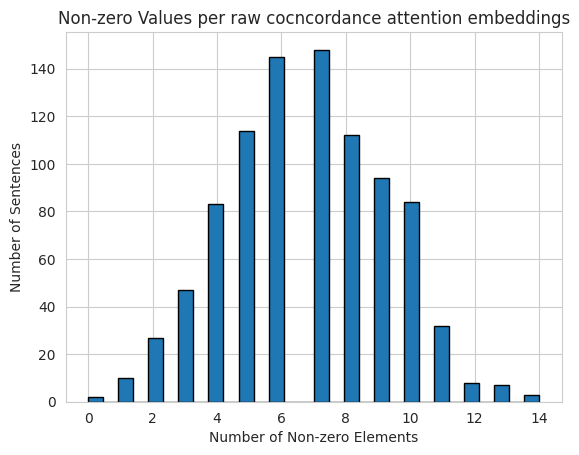

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Stack the embeddings into a 2D numpy array
X = np.stack(labyrinthus_df["att_conc_l11_xlmr_raw_embed"].values)

# Count number of non-zero entries in each row
non_zero_counts = np.count_nonzero(X, axis=1)

# Print basic stats
print("Min:", non_zero_counts.min())
print("Max:", non_zero_counts.max())
print("Mean:", non_zero_counts.mean())
print("Median:", np.median(non_zero_counts))
print("Std:", non_zero_counts.std())

# Plot histogram
plt.hist(non_zero_counts, bins=30, edgecolor='black')
plt.title("Non-zero Values per raw cocncordance attention embeddings")
plt.xlabel("Number of Non-zero Elements")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

In [65]:
labyrinthus_df["att_l9_xlmr"].apply(lambda d: len(d) == 0).mean()

0.0

In [103]:
# Which rows have all-zero embeddings?
zero_rows = np.where(np.count_nonzero(X, axis=1) == 0)[0]

print("Number of zero rows:", len(zero_rows))
print("Example sentence with zero embedding:")
print(labyrinthus_df.iloc[zero_rows[0]]["sentence_text"])  # or your sentence column name

Number of zero rows: 19
Example sentence with zero embedding:
Quattuor sunt [autem] labyrinthi;


## Projections

In [4]:
labyrinthus_df = pd.read_parquet("../data/large_files/labyrinthus_embeddings.parquet")

In [5]:
# ─────────────────────────── reductions dict (unchanged) ──────────────────────────
from sklearn.decomposition import PCA
from sklearn.manifold      import TSNE
import umap, numpy as np, pandas as pd, matplotlib.pyplot as plt

REDUCTIONS = {
    # --- UMAP variants ---
    "umap_10_0.05": lambda: umap.UMAP(n_neighbors=10,  min_dist=0.05,
                                      metric="cosine", random_state=42),
    "umap_50_0.5" : lambda: umap.UMAP(n_neighbors=50,  min_dist=0.5 ,
                                      metric="cosine", random_state=42),
    "umap_100_0.8": lambda: umap.UMAP(n_neighbors=100, min_dist=0.8,
                                      metric="cosine", random_state=42),
    # --- t-SNE variants ---
    "tsne_10": lambda: TSNE(n_components=2, perplexity=10,
                            metric="cosine", init="pca",
                            learning_rate=200, random_state=42),
    "tsne_30": lambda: TSNE(n_components=2, perplexity=30,
                            metric="cosine", init="pca",
                            learning_rate=200, random_state=42),
    "tsne_50": lambda: TSNE(n_components=2, perplexity=50,
                            metric="cosine", init="pca",
                            learning_rate=200, random_state=42),
    # --- PCA variants ---
    "pca_std"   : lambda: PCA(n_components=2, whiten=False , random_state=42),
    "pca_whiten": lambda: PCA(n_components=2, whiten=True  , random_state=42),
    # --- PCA→t-SNE speed trick ---
    "pca10_tsne": lambda: (
        lambda X: TSNE(n_components=2, perplexity=30,
                       init="pca", random_state=42)
                  .fit_transform(PCA(n_components=10, random_state=42)
                                 .fit_transform(X))
    )
}
# ────────────────────────────────────────────────────────────────────────────────

def compute_projections(embeddings: np.ndarray,
                        reductions: dict[str, callable] = REDUCTIONS) -> pd.Series:
    """
    embeddings : np.ndarray  shape (N, dim)
    returns    : pd.Series  length N, each cell = {proj_name: {"x": …,"y": …}, …}
    """
    X = np.asarray(embeddings)
    coords = {}

    for name, maker in reductions.items():
        reducer = maker()
        if hasattr(reducer, "fit_transform"):
            coords[name] = reducer.fit_transform(X)
        else:                      # callable expecting X directly (pca10_tsne)
            coords[name] = reducer(X)

    def row_dict(i):
        return {n: {"x": float(coords[n][i, 0]), "y": float(coords[n][i, 1])}
                for n in coords}

    return pd.Series([row_dict(i) for i in range(len(X))])


In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm

# ------------------------------------------------------------------
# 1)  Obtain pallette
from matplotlib import cm

unique_lbls = sorted(labyrinthus_df["classification_single_label"].unique())
N = len(unique_lbls)
# Pick a discrete palette, extend if labels > 20
cmap_name = "tab20" if N > 10 else "tab10"
cmap = cm.get_cmap(cmap_name, N)

palette = {
    lbl: cmap(i)
    for i, lbl in enumerate(unique_lbls)
}

In [15]:

# ---# ---------------------------------------------------------------
# 3)  Plot function with coloured dots
# ------------------------------------------------------------------


def plot_projections(title, projections: pd.Series,
                     labels: pd.Series,
                     palette: dict,
                     show: bool = True) -> plt.Figure:
    PROJECTION_GROUPS = {
        "UMAP":  ["umap_10_0.05", "umap_50_0.5", "umap_100_0.8"],
        "t-SNE": ["tsne_10",      "tsne_30",     "tsne_50"],
        "PCA":   ["pca_std",      "pca_whiten",  "pca10_tsne"],
    }

    fig, axes = plt.subplots(3, 3, figsize=(13, 13))
    fig.suptitle("2-D projections of {} embeddings".format(title), fontsize=16)

    for row_idx, (tech, keys) in enumerate(PROJECTION_GROUPS.items()):
        for col_idx, key in enumerate(keys):
            ax = axes[row_idx, col_idx]

            xs = projections.apply(lambda d: d[key]["x"])
            ys = projections.apply(lambda d: d[key]["y"])
            cols = labels.map(palette)

            ax.scatter(xs, ys, c=cols, s=8, alpha=0.6)
            ax.set_title(f"{tech} — {key}", fontsize=9)
            ax.axis("off")

    # add a compact legend outside the grid
    handles = [plt.Line2D([0], [0], marker='o', linestyle='',
                          color=palette[l], label=l, markersize=6)
               for l in labels.unique()]
    fig.legend(handles=handles, ncol=min(5, len(handles)),
               bbox_to_anchor=(0.5, -0.02), loc="upper center")

    plt.tight_layout(rect=[0, 0.02, 1, 0.95])

    if not show:
        plt.close(fig)  # Suppress automatic display in Jupyter

    return fig

In [8]:
labyrinthus_df["classification_single_label"].value_counts()

classification_single_label
medical_anatomical       194
mythological             183
metaphorical_general     180
geographical             103
philosophical             92
scientific_alchemical     71
poetic                    57
astronomical              18
spiritual_religious       14
historical_political       4
Name: count, dtype: int64

In [16]:
def plot_projections_for_embeddings(emb_array, title, show=True):
    proj_series = compute_projections(emb_array)
    fig = plot_projections(title,
                       proj_series,
                       labyrinthus_df["classification_single_label"],
                       palette, show)
    return fig

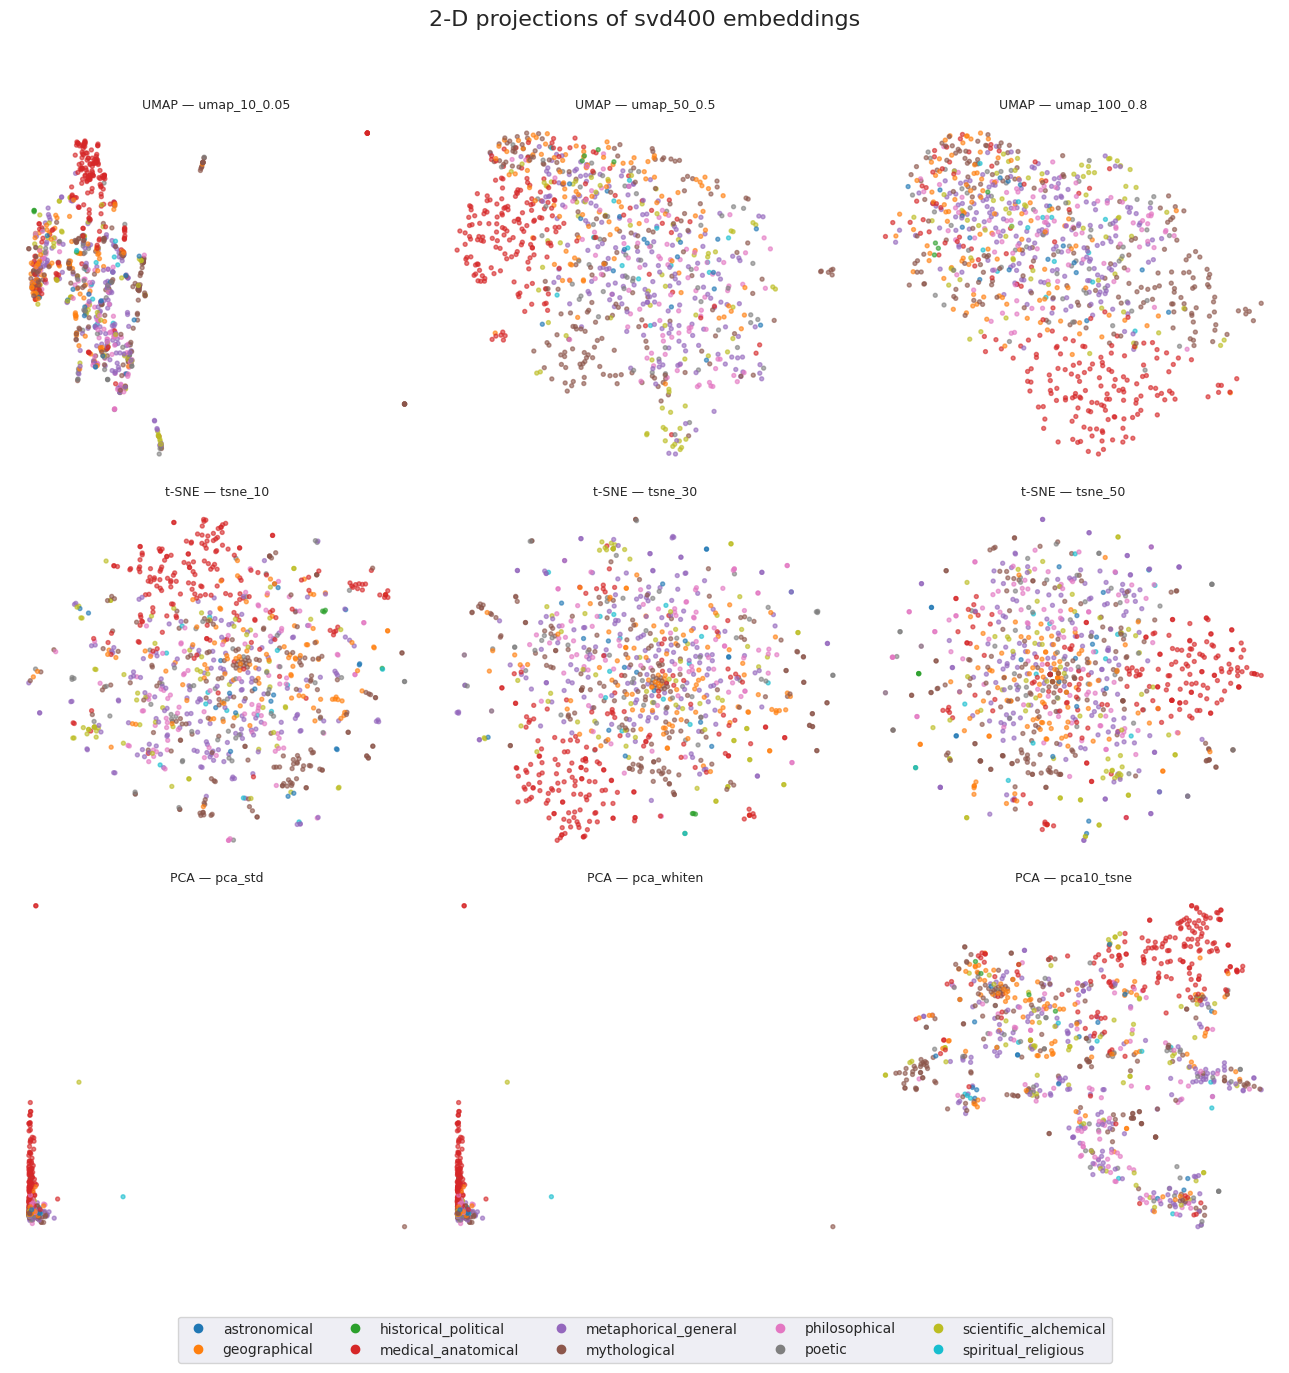

In [10]:
emb_array = np.stack(labyrinthus_df["svd400"].values)
fig = plot_projections_for_embeddings(emb_array, "svd400")

In [83]:
fig.savefig("../figures/labyrinthus_projections_svd400.png", dpi=300)

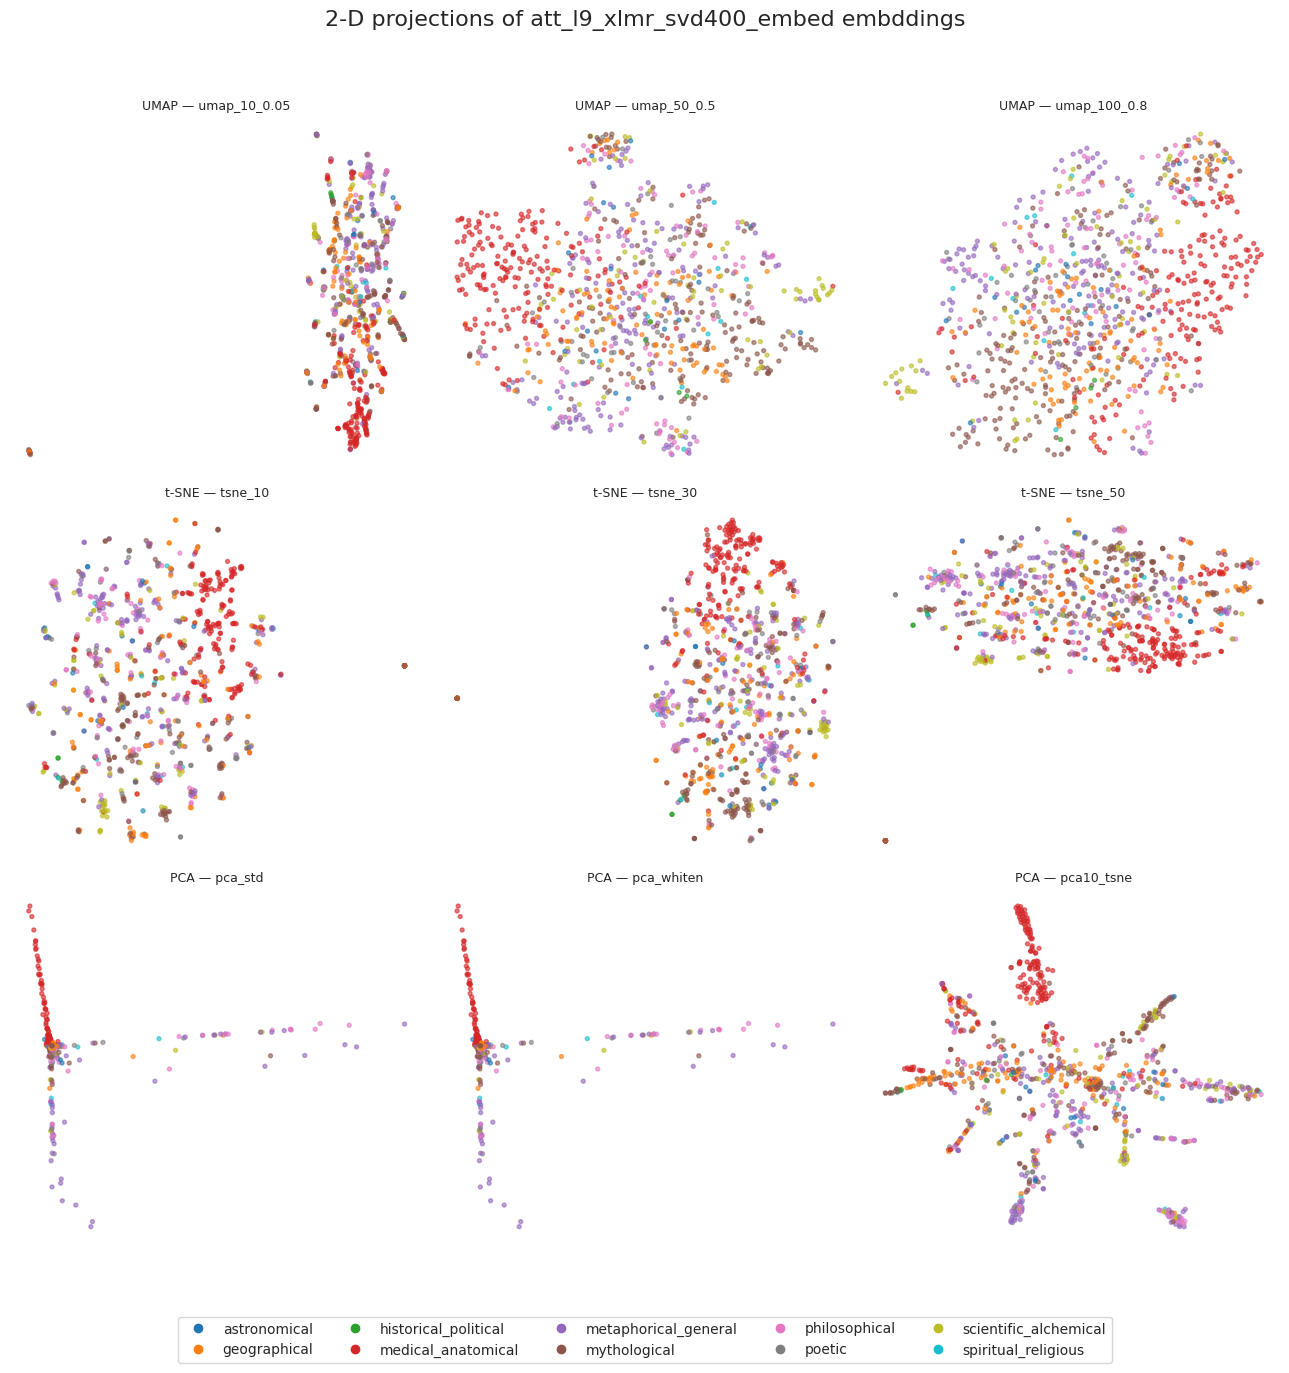

In [75]:
emb_array = np.stack(labyrinthus_df["att_l9_xlmr_svd400_embed"].values)
fig = plot_projections_for_embeddings(emb_array, "att_l9_xlmr_svd400_embed")

In [11]:
def concatenate_embeddings(df: pd.DataFrame, columns: list[str]) -> np.ndarray:
    """
    Concatenate and stack embeddings from the specified columns for each row.
    Each selected column must contain array-like (same-length) embeddings per row.

    Returns
    -------
    emb_array : np.ndarray
        Shape (num_rows, total_embedding_dim)
    """
    # Each result is a single flat vector for one row (concatenating all columns)
    concat_rows = [
        np.concatenate([df[col].iloc[i] for col in columns])
        for i in range(len(df))
    ]
    return np.stack(concat_rows)


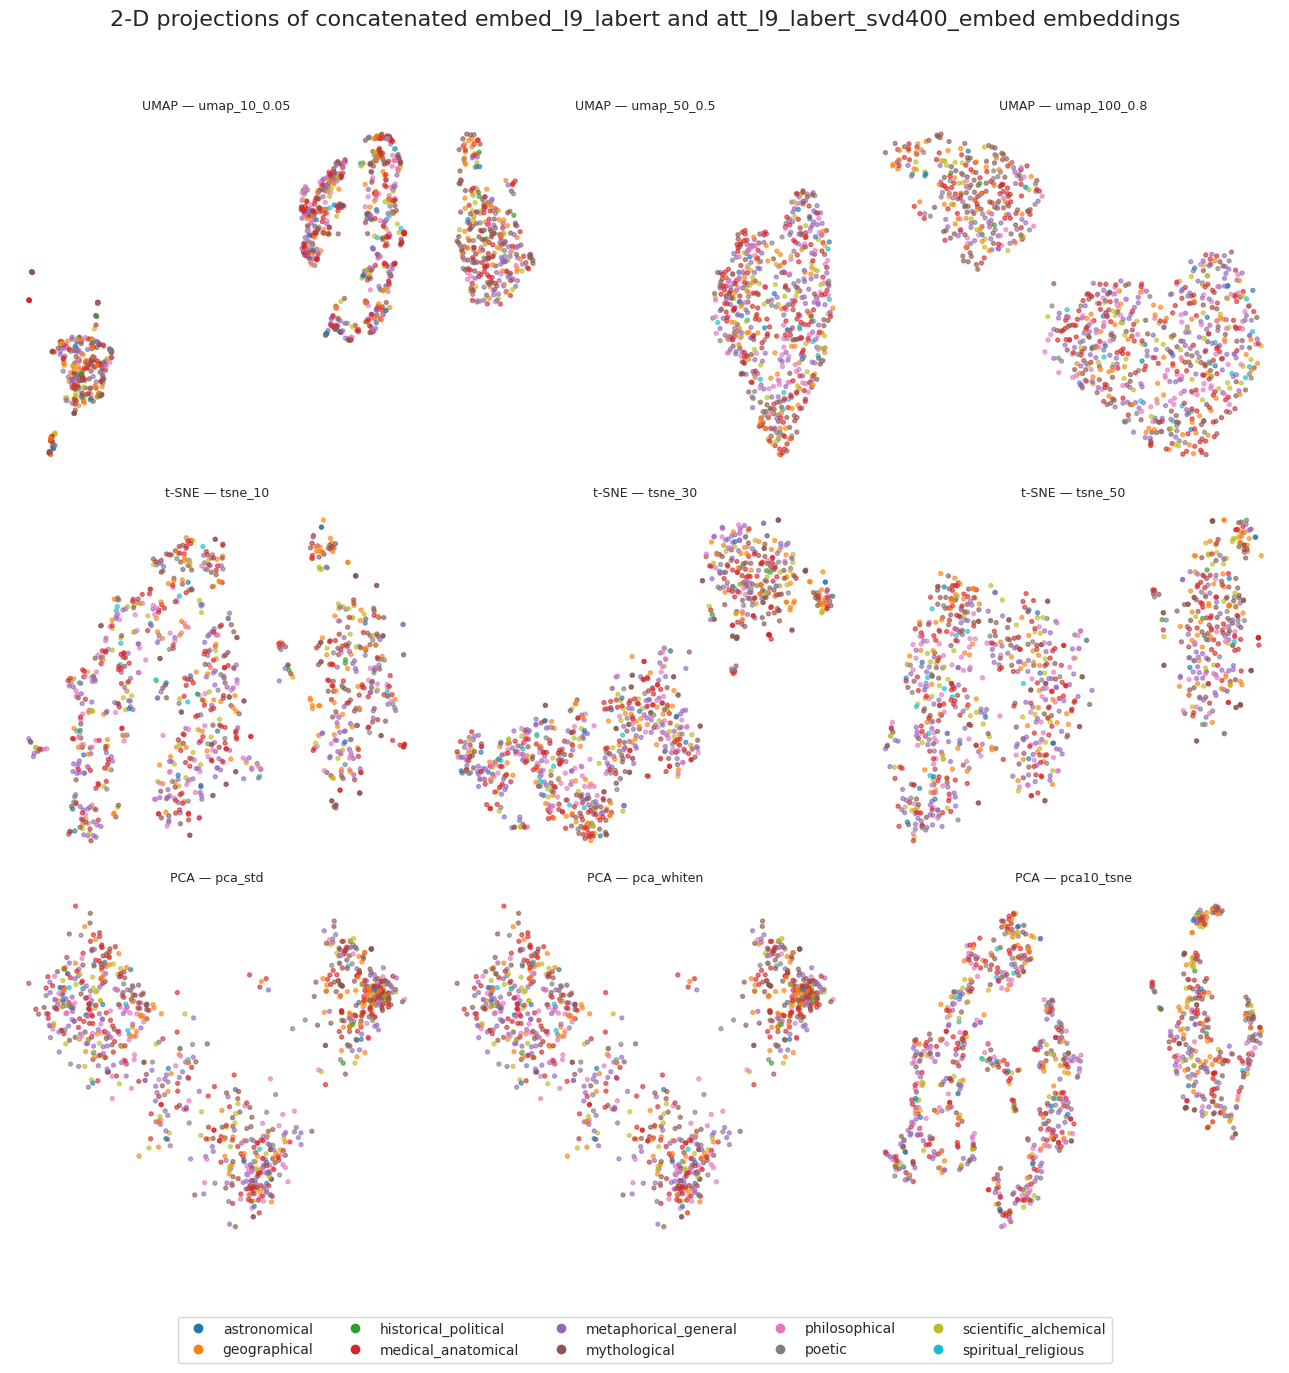

In [90]:
# Choose any embedding column you've built:
emb_array = concatenate_embeddings(labyrinthus_df, ["embed_l9_labert", "att_l9_labert_svd400_embed"])

fig = plot_projections_for_embeddings(emb_array, "concatenated embed_l9_labert and att_l9_labert_svd400_embed")

In [91]:
fig.savefig("../figures/labyrinthus_projections_concatenated_labert_l9.png", dpi=300)

In [86]:
labyrinthus_df.columns.tolist()

['author',
 'title',
 'grela_id',
 'sentence_id',
 'sentence_text',
 'context_3sents',
 'tokens',
 'concordance_tokens',
 'not_before',
 'not_after',
 'date_random',
 'lagt_genre',
 'lagt_provenience',
 'noscemus_genre',
 'noscemus_discipline',
 'target_token_id',
 'target_char_start',
 'target_char_end',
 'classification_single',
 'classification_single_label',
 'xlmr_sentence',
 'xlmr_sp_tokens',
 'xlmr_aug_tokens',
 'xlmr_conc_text',
 'xlmr_conc_sp_tokens',
 'xlmr_conc_aug_tokens',
 'labert_sentence',
 'labert_sp_tokens',
 'labert_aug_tokens',
 'labert_conc_text',
 'labert_conc_sp_tokens',
 'labert_conc_aug_tokens',
 'embed_l7_xlmr',
 'att_l7_xlmr',
 'embed_conc_l7_xlmr',
 'att_conc_l7_xlmr',
 'embed_l8_xlmr',
 'att_l8_xlmr',
 'embed_conc_l8_xlmr',
 'att_conc_l8_xlmr',
 'embed_l9_xlmr',
 'att_l9_xlmr',
 'embed_conc_l9_xlmr',
 'att_conc_l9_xlmr',
 'embed_l10_xlmr',
 'att_l10_xlmr',
 'embed_conc_l10_xlmr',
 'att_conc_l10_xlmr',
 'embed_l11_xlmr',
 'att_l11_xlmr',
 'embed_conc_l11_xlmr

In [12]:
embeddings_unsorted = ['embed_l7_xlmr',
 'embed_conc_l7_xlmr',
 'embed_l8_xlmr',
 'embed_conc_l8_xlmr',
 'embed_l9_xlmr',
 'embed_conc_l9_xlmr',
 'embed_l10_xlmr',
 'embed_conc_l10_xlmr',
 'embed_l11_xlmr',
 'embed_conc_l11_xlmr',
 'embed_l7_labert',
 'embed_conc_l7_labert',
 'embed_l8_labert',
 'embed_conc_l8_labert',
 'embed_l9_labert',
 'embed_conc_l9_labert',
 'embed_l10_labert',
 'embed_conc_l10_labert',
 'embed_l11_labert',
 'embed_conc_l11_labert',
 'att_l7_xlmr_svd400_embed',
 'att_l8_xlmr_svd400_embed',
 'att_l9_xlmr_svd400_embed',
 'att_l10_xlmr_svd400_embed',
 'att_l11_xlmr_svd400_embed',
 'att_conc_l7_xlmr_svd400_embed',
 'att_conc_l8_xlmr_svd400_embed',
 'att_conc_l9_xlmr_svd400_embed',
 'att_conc_l10_xlmr_svd400_embed',
 'att_conc_l11_xlmr_svd400_embed',
 'att_l7_labert_svd400_embed',
 'att_l8_labert_svd400_embed',
 'att_l9_labert_svd400_embed',
 'att_l10_labert_svd400_embed',
 'att_l11_labert_svd400_embed',
 'att_conc_l7_labert_svd400_embed',
 'att_conc_l8_labert_svd400_embed',
 'att_conc_l9_labert_svd400_embed',
 'att_conc_l10_labert_svd400_embed',
 'att_conc_l11_labert_svd400_embed',
 'svd400',
 'svd400_conc']

In [13]:
xlmr_sentence_contextual_embeddings = [
    'embed_l7_xlmr', 'embed_l8_xlmr', 'embed_l9_xlmr',
    'embed_l10_xlmr', 'embed_l11_xlmr'
]

xlmr_concordance_contextual_embeddings = [
    'embed_conc_l7_xlmr', 'embed_conc_l8_xlmr', 'embed_conc_l9_xlmr',
    'embed_conc_l10_xlmr', 'embed_conc_l11_xlmr'
]

xlmr_sentence_attention_embeddings = [
    'att_l7_xlmr_svd400_embed', 'att_l8_xlmr_svd400_embed',
    'att_l9_xlmr_svd400_embed', 'att_l10_xlmr_svd400_embed',
    'att_l11_xlmr_svd400_embed'
]

xlmr_concordance_attention_embeddings = [
    'att_conc_l7_xlmr_svd400_embed', 'att_conc_l8_xlmr_svd400_embed',
    'att_conc_l9_xlmr_svd400_embed', 'att_conc_l10_xlmr_svd400_embed',
    'att_conc_l11_xlmr_svd400_embed'
]
labert_sentence_contextual_embeddings = [
    'embed_l7_labert', 'embed_l8_labert', 'embed_l9_labert',
    'embed_l10_labert', 'embed_l11_labert'
]

labert_concordance_contextual_embeddings = [
    'embed_conc_l7_labert', 'embed_conc_l8_labert', 'embed_conc_l9_labert',
    'embed_conc_l10_labert', 'embed_conc_l11_labert'
]

labert_sentence_attention_embeddings = [
    'att_l7_labert_svd400_embed', 'att_l8_labert_svd400_embed',
    'att_l9_labert_svd400_embed', 'att_l10_labert_svd400_embed',
    'att_l11_labert_svd400_embed'
]

labert_concordance_attention_embeddings = [
    'att_conc_l7_labert_svd400_embed', 'att_conc_l8_labert_svd400_embed',
    'att_conc_l9_labert_svd400_embed', 'att_conc_l10_labert_svd400_embed',
    'att_conc_l11_labert_svd400_embed'
]

baseline_embeddings = ['svd400', 'svd400_conc']

In [96]:
for emb_col in embeddings_unsorted:
    emb_array = np.stack(labyrinthus_df[emb_col].values)
    fig = plot_projections_for_embeddings(emb_array, emb_col, show=False)
    fig.savefig(f"../figures/labyrinthus_projections_{emb_col}.png", dpi=300)

In [17]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        for L in range(7, 12):
            if context == "sentence":
                emb1 = f"embed_l{L}_{model}"
                emb2 = f"att_l{L}_{model}_svd400_embed"
            else:
                emb1 = f"embed_conc_l{L}_{model}"
                emb2 = f"att_conc_l{L}_{model}_svd400_embed"

            emb_array = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
            fig = plot_projections_for_embeddings(emb_array, f"concatenated {emb1} & {emb2}", show=False)

            safe_name = f"{emb1}_AND_{emb2}".replace("/", "_")
            fig.savefig(f"../figures/labyrinthus_projections_{model}_{safe_name}.png", dpi=300)

In [85]:
#labyrinthus_df.to_parquet("../data/large_files/labyrinthus_embeddings.parquet")

## Supervised classification

In [44]:
# ------------------------------------------------------------------
# common objects
# ------------------------------------------------------------------
y  = labyrinthus_df["label20"].values           # 21 classes incl. “other”
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = make_pipeline(
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=4000,
                       multi_class="multinomial",
                       solver="lbfgs",
                       n_jobs=-1)
)

# ------------------------------------------------------------------
# loop over layers 8–11
# ------------------------------------------------------------------
results = []

for L in range(6, 12):
    X_emb = np.stack(labyrinthus_df[f"embed_l{L}"].values)                 # (N,768)
    X_att = np.stack(labyrinthus_df[f"att_l{L}_svd400_embed"].values)      # (N,400)

    f1_emb = cross_val_score(pipe, X_emb, y, cv=cv, scoring="f1_macro").mean()
    f1_att = cross_val_score(pipe, X_att, y, cv=cv, scoring="f1_macro").mean()

    results.append((L, f1_emb, f1_att))
    print(f"Layer {L}:  Embed-only F1 = {f1_emb:.4f}   |   Att-only F1 = {f1_att:.4f}")

# ------------------------------------------------------------------
# (optional) nice DataFrame of the summary
# ------------------------------------------------------------------
layer_perf = pd.DataFrame(results,
                          columns=["Layer", "Embed_F1", "Att_SVD400_F1"])
display(layer_perf)

Layer 6:  Embed-only F1 = 0.3825   |   Att-only F1 = 0.3816
Layer 7:  Embed-only F1 = 0.3870   |   Att-only F1 = 0.3616
Layer 8:  Embed-only F1 = 0.3897   |   Att-only F1 = 0.3312
Layer 9:  Embed-only F1 = 0.3949   |   Att-only F1 = 0.3900
Layer 10:  Embed-only F1 = 0.3785   |   Att-only F1 = 0.3925
Layer 11:  Embed-only F1 = 0.3936   |   Att-only F1 = 0.3920


,Layer,Embed_F1,Att_SVD400_F1
0,6,0.382507,0.381552
1,7,0.387049,0.361561
2,8,0.389703,0.331158
3,9,0.394855,0.390050
4,10,0.378511,0.392453
5,11,0.393585,0.391955


In [48]:
X_emb = np.stack(labyrinthus_df["svd400"].values)                 #
f1_emb = cross_val_score(pipe, X_emb, y, cv=cv, scoring="f1_macro").mean()
f1_emb

0.36213038484609095

In [46]:
# --------------------------------------------------------------------
# 0.  Collect feature matrices once, keep in RAM  (~ few-100 MB total)
# --------------------------------------------------------------------
embed_mat   = {L: np.stack(labyrinthus_df[f"embed_l{L}"].values)
               for L in range(6, 12)}
att_mat     = {L: np.stack(labyrinthus_df[f"att_l{L}_svd400_embed"].values)
               for L in range(6, 12)}

y = labyrinthus_df["label20"].values          # 21 classes (top-20 + other)

# --------------------------------------------------------------------
# 1.  Cross-validation set-up
# --------------------------------------------------------------------
from sklearn.linear_model    import LogisticRegression
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipe = make_pipeline(StandardScaler(with_mean=False),
                     LogisticRegression(max_iter=4000,
                                        multi_class="multinomial",
                                        solver="lbfgs",
                                        n_jobs=-1))
cv = StratifiedKFold(5, shuffle=True, random_state=42)

# --------------------------------------------------------------------
# 2.  Evaluate every Emb-layer × Att-layer pair
# --------------------------------------------------------------------
records = []
for L_emb in range(6, 11+1):
    for L_att in range(6, 11+1):
        X_pair = np.hstack([embed_mat[L_emb], att_mat[L_att]])   # concat (768 + 400)
        score  = cross_val_score(pipe, X_pair, y,
                                 cv=cv, scoring="f1_macro").mean()
        records.append({"Embed_L": L_emb,
                        "Att_L":   L_att,
                        "F1_macro": score})

pair_df = (pd.DataFrame(records)
             .pivot(index="Embed_L", columns="Att_L", values="F1_macro")
             .round(3))

pair_df

Att_L,6,7,8,9,10,11
Embed_L,,,,,,
6,0.424,0.431,0.406,0.431,0.445,0.448
7,0.444,0.447,0.421,0.441,0.462,0.457
8,0.409,0.433,0.416,0.438,0.441,0.440
9,0.416,0.436,0.411,0.427,0.454,0.443
10,0.433,0.463,0.404,0.457,0.452,0.460
11,0.465,0.464,0.426,0.450,0.463,0.465


## backupm

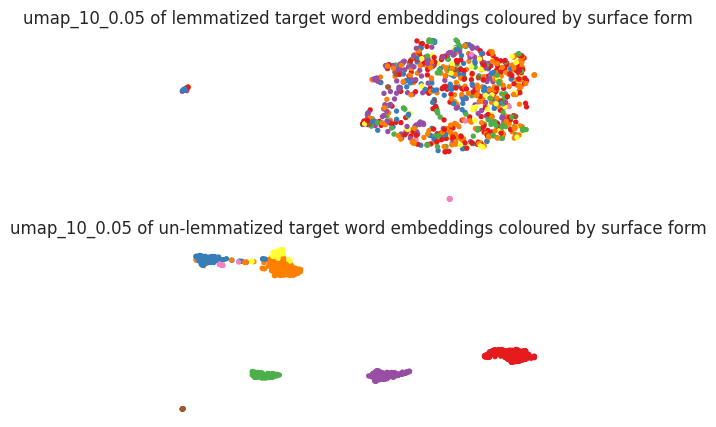

In [170]:
surface = labyrinthus_df["concordance_tokens"].apply(
    lambda toks: next(t for t in toks if t["lemma"].lower() == "labyrinthus")["token_text"].lower()
)

palette = {f: c for f, c in zip(surface.unique(), plt.cm.Set1.colors)}


fig, [ax1, ax2] = plt.subplots(2,1, figsize=(5, 5))

emb_array = np.stack(labyrinthus_df["embed_hybrid_allpos"].values)
proj_series = compute_projections(emb_array)

proj_key = "umap_10_0.05"
xs = proj_series.str[proj_key].str["x"]
ys = proj_series.str[proj_key].str["y"]

ax1.scatter(xs, ys, c=surface.map(palette), s=8)
ax1.set_title(f"{proj_key} of lemmatized target word embeddings coloured by surface form")
ax1.axis("off")

emb_array = np.stack(labyrinthus_df["embed_surface_allpos"].values)
proj_series = compute_projections(emb_array)

proj_key = "umap_10_0.05"

xs = proj_series.str[proj_key].str["x"]
ys = proj_series.str[proj_key].str["y"]
ax2.scatter(xs, ys, c=surface.map(palette), s=8)
ax2.set_title(f"{proj_key} of un-lemmatized target word embeddings coloured by surface form")
ax2.axis("off")

plt.show()

In [85]:
labyrinthus_df.head(5)

,author,title,grela_id,sentence_id,sentence_text,context_3sents,tokens,concordance_tokens,classification,not_before,...,embed_l8,att_l8,embed_l9,att_l9,embed_l10,att_l10,embed_l11,att_l11,svd300,svd400
0,Humbertus Silvae Candidae1010-1061,Adversus Simoniacos,cc_10012,cc_10012_2812,"Exploret qui potest qualiter, et qua hunc laby...","Si enim, ut philosophus allegat, qui non prohi...","[{'char_end': 8, 'char_start': 0, 'lemma': 'ex...","[{'char_end': 303, 'char_start': 299, 'lemma':...",metaphorical,1010.0,...,"[-0.5996939, -0.08402276, 0.24582314, 0.246073...","{'exploro': {'weight': 0.007501654326915741, '...","[-0.4901215, -0.014518358, 0.11257135, -0.0287...","{'exploro': {'weight': 0.0040437448769807816, ...","[-0.22389103, -0.08037936, 0.4684307, -0.07405...","{'exploro': {'weight': 0.0023853108286857605, ...","[0.015361398, -0.05652492, 0.28677505, -0.2481...","{'exploro': {'weight': 0.004686874337494373, '...","[1.0248758, -0.109425925, 0.18502058, -0.12902...","[1.0248758, -0.10942612, 0.18502046, -0.129020..."
1,Petrus Damianus,"Patrologia Latina, vol. 145",cc_10077,cc_10077_50,"Et poenae factus est auctor, qui poenalis laby...","Protinus igitur projectus in taurum, quod infe...","[{'char_end': 2, 'char_start': 0, 'lemma': 'et...","[{'char_end': 83, 'char_start': 75, 'lemma': '...","poetic, metaphorical",1007.0,...,"[-0.55678105, -0.031190008, 0.18337364, 0.4370...","{'et': {'weight': 0.003848183201625943, 'piece...","[-0.4923613, -0.1829148, 0.15112661, 0.3343788...","{'et': {'weight': 0.006557437125593424, 'piece...","[-0.3993842, -0.17896965, 0.33668458, 0.163039...","{'et': {'weight': 0.0010180403478443623, 'piec...","[-0.053815715, -0.15342486, 0.2319887, -0.1168...","{'et': {'weight': 0.005556851625442505, 'piece...","[0.96935123, -0.052010406, 0.13268225, -0.0820...","[0.9693511, -0.052010484, 0.1326823, -0.082074..."
2,Rodulphus S. Trudonis,Vita S. Lietberti,cc_10161,cc_10161_32,mirantibus magistris penetrat labyrinthos Scri...,Ducitur sitibundo pectore currens ad fontem ph...,"[{'char_end': 10, 'char_start': 0, 'lemma': 'm...","[{'char_end': 144, 'char_start': 136, 'lemma':...","metaphorical, philosophical",NaN,...,"[-0.070512734, -0.010591162, -0.093808964, 0.2...","{'miro': {'weight': 0.03680548816919327, 'piec...","[-0.10879725, 0.09882534, -0.008079263, 0.1313...","{'miro': {'weight': 0.01636236347258091, 'piec...","[-0.23412725, 0.0044030286, 0.25399756, 0.1273...","{'miro': {'weight': 0.00277316989377141, 'piec...","[-0.034478694, 0.042206235, 0.24609125, -0.210...","{'miro': {'weight': 0.004833581391721964, 'pie...","[0.98060316, -0.115663484, -0.026802924, -0.18...","[0.98060316, -0.11566342, -0.02680232, -0.1812..."
3,Domnizo Canusinus,Vita et carmina Mathildis,cc_10261,cc_10261_892,"Ista fuit, quae par habuit regemque Deumque, H...","Ista fuit, quae diripuit Paulumque Petrumque; ...","[{'char_end': 4, 'char_start': 0, 'lemma': 'is...","[{'char_end': 43, 'char_start': 40, 'lemma': '...","metaphorical, poetic",1130.0,...,"[-0.20573536, 0.0940672, 0.14274016, 0.2886553...","{'iste': {'weight': 0.001744522713124752, 'pie...","[-0.23654726, 0.043308813, 0.059855238, 0.2533...","{'iste': {'weight': 0.0017882290994748473, 'pi...","[-0.23956929, -0.014918415, 0.138808, 0.211936...","{'iste': {'weight': 0.0018670707941055298, 'pi...","[0.022103995, -0.04788581, 0.04260912, -0.0920...","{'iste': {'weight': 0.005081632640212774, 'pie...","[1.101139, 0.7583047, -0.082435116, -0.2232320...","[1.1011388, 0.75830466, -0.08243356, -0.223232..."
4,Durandus Trobarnensis,Liber de corpore et sanguine Christi,cc_10298,cc_10298_920,Uerum quia quidam peruersi ex hac tanti doctor...,Xxui. | Uerum quia quidam peruersi ex hac tant...,"[{'char_end': 5, 'char_start': 0, 'lemma': 'ue...","[{'char_end': 10, 'char_start': 6, 'lemma': 'q...",metaphorical,NaN,...,"[-0.41097933, 0.07569985, 0.18987988, 0.161353...","{'uerus': {'weight': 0.005245175678282976, 'pi...","[-0.40861088, -0.1697307, 0.14324735, 0.064479...","{'uerus': {'wei

In [ ]:
surface = labyrinthus_df'["concordance_tokens"].apply(
    lambda toks: next(t for t in toks if t["lemma"].lower() == "labyrinthus")["token_text"].lower()
)

palette = {f: c for f, c in zip(surface.unique(), plt.cm.Set1.colors)}


fig, [ax1, ax2] = plt.subplots(2,1, figsize=(5, 5))

emb_array = np.stack(labyrinthus_df["embed_hybrid_allpos"].values)
proj_series = compute_projections(emb_array)

proj_key = "umap_10_0.05"
xs = proj_series.str[proj_key].str["x"]
ys = proj_series.str[proj_key].str["y"]

ax1.scatter(xs, ys, c=surface.map(palette), s=8)
ax1.set_title(f"{proj_key} of lemmatized target word embeddings coloured by surface form")
ax1.axis("off")

emb_array = np.stack(labyrinthus_df["embed_surface_allpos"].values)
proj_series = compute_projections(emb_array)

proj_key = "umap_10_0.05"

xs = proj_series.str[proj_key].str["x"]
ys = proj_series.str[proj_key].str["y"]
ax2.scatter(xs, ys, c=surface.map(palette), s=8)
ax2.set_title(f"{proj_key} of un-lemmatized target word embeddings coloured by surface form")
ax2.axis("off")

plt.show()